## **Import required libraries**

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## **Load Data and Prepare Time Columns**

In [100]:
df = pd.read_csv('customer_clean_transactions.csv')

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce', dayfirst=True)

df['Month'] = df['InvoiceDate'].dt.to_period('M')
df['Date'] = df['InvoiceDate'].dt.date
df['Day'] = df['InvoiceDate'].dt.day
df['Weekday'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

df['Revenue'] = df['Quantity'] * df['Price']


## **Monthly Revenue Trend**

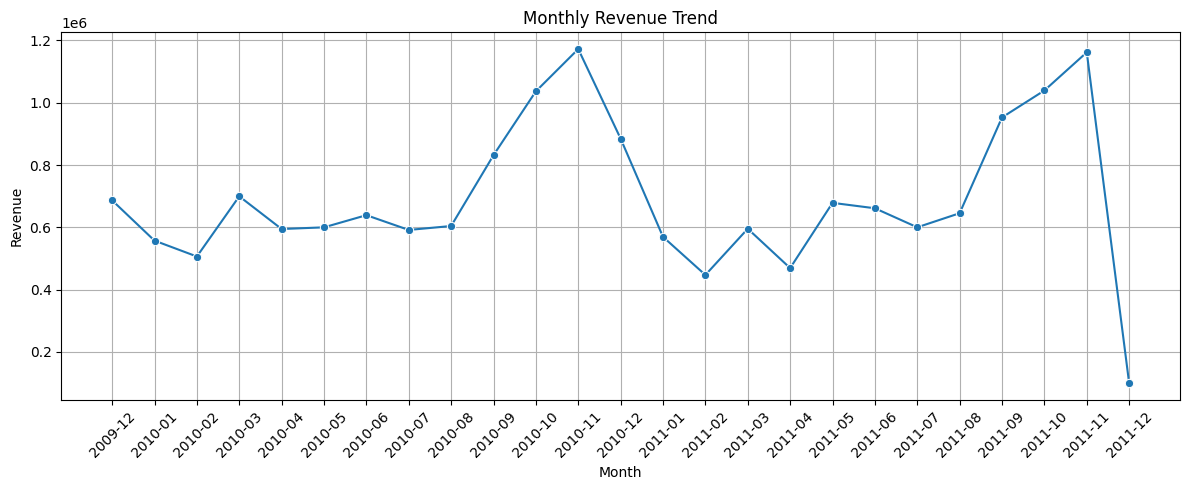

In [101]:
monthly = df.groupby('Month')['Revenue'].sum().reset_index()

monthly['Month'] = monthly['Month'].astype(str)

plt.figure(figsize=(12, 5))
sns.lineplot(x='Month', y='Revenue', data=monthly, marker='o')
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## **Daily Revenue Trend**

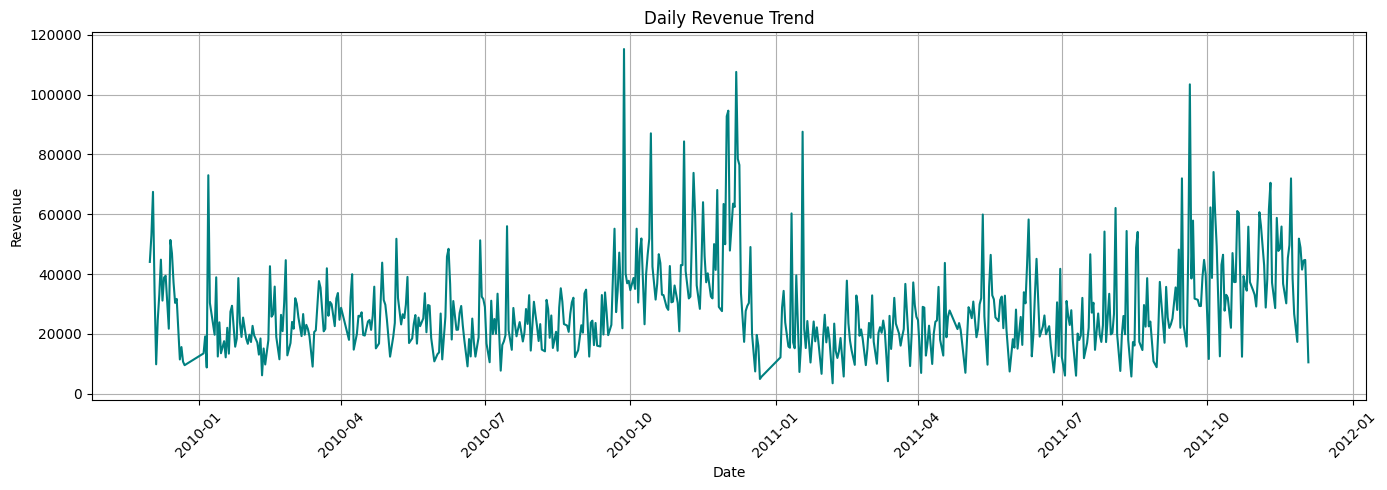

In [102]:
daily = df.groupby('Date')['Revenue'].sum().reset_index()

plt.figure(figsize=(14, 5))
sns.lineplot(x='Date', y='Revenue', data=daily, color='teal')
plt.title("Daily Revenue Trend")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## **Revenue by Weekday**

/tmp/ipython-input-103-4197371014.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weekday', y='Revenue', data=weekday, palette='mako')


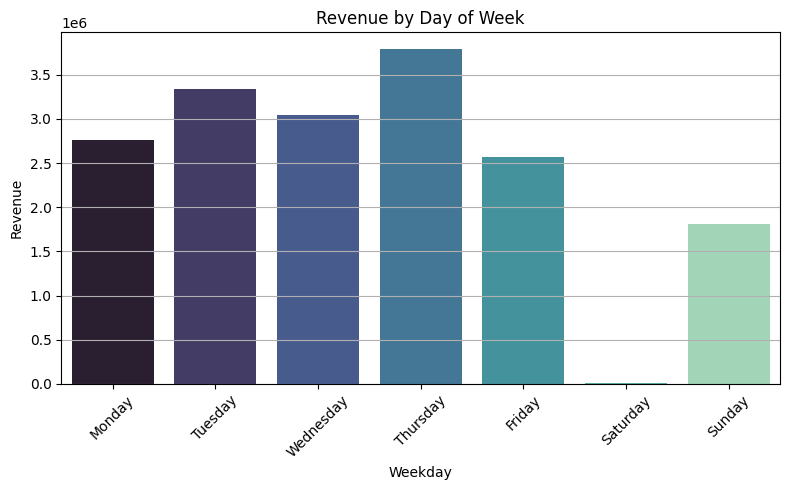

In [103]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday = df.groupby('Weekday')['Revenue'].sum().reindex(weekday_order).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Weekday', y='Revenue', data=weekday, palette='mako')
plt.title("Revenue by Day of Week")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


## **Revenue by Hour of Day**

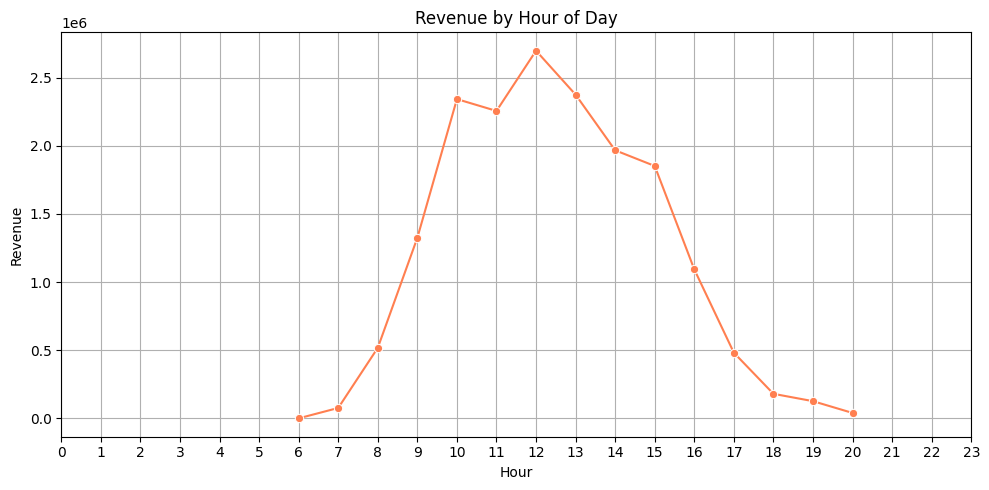

In [104]:
hourly = df.groupby('Hour')['Revenue'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Hour', y='Revenue', data=hourly, marker='o', color='coral')
plt.title("Revenue by Hour of Day")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


## **Moving Average for Revenue**

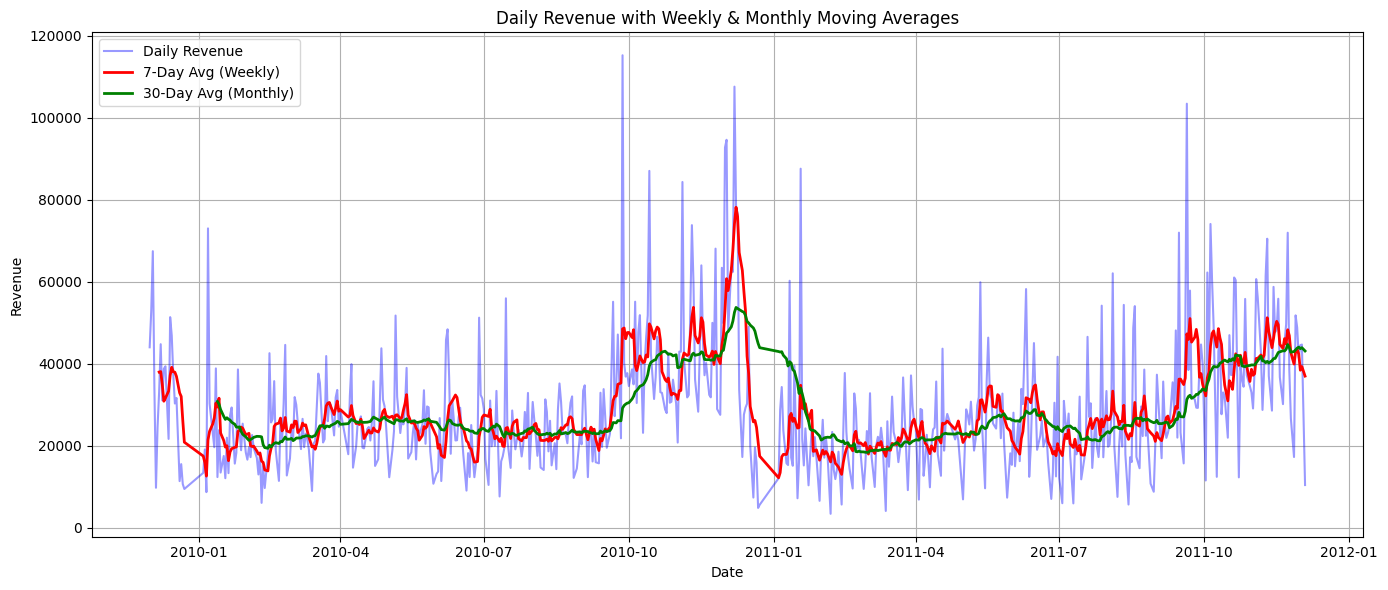

In [105]:
daily['7D_MA'] = daily['Revenue'].rolling(window=7).mean()
daily['Weekly_MA'] = daily['Revenue'].rolling(window=7).mean()
daily['Monthly_MA'] = daily['Revenue'].rolling(window=30).mean()

plt.figure(figsize=(14, 6))

plt.plot(daily['Date'], daily['Revenue'], label='Daily Revenue', color='blue', alpha=0.4)
plt.plot(daily['Date'], daily['7D_MA'], label='7-Day Avg (Weekly)', color='red', linewidth=2)
plt.plot(daily['Date'], daily['Monthly_MA'], label='30-Day Avg (Monthly)', color='green', linewidth=2)

plt.title("Daily Revenue with Weekly & Monthly Moving Averages")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **Anomaly Detection in Revenue**

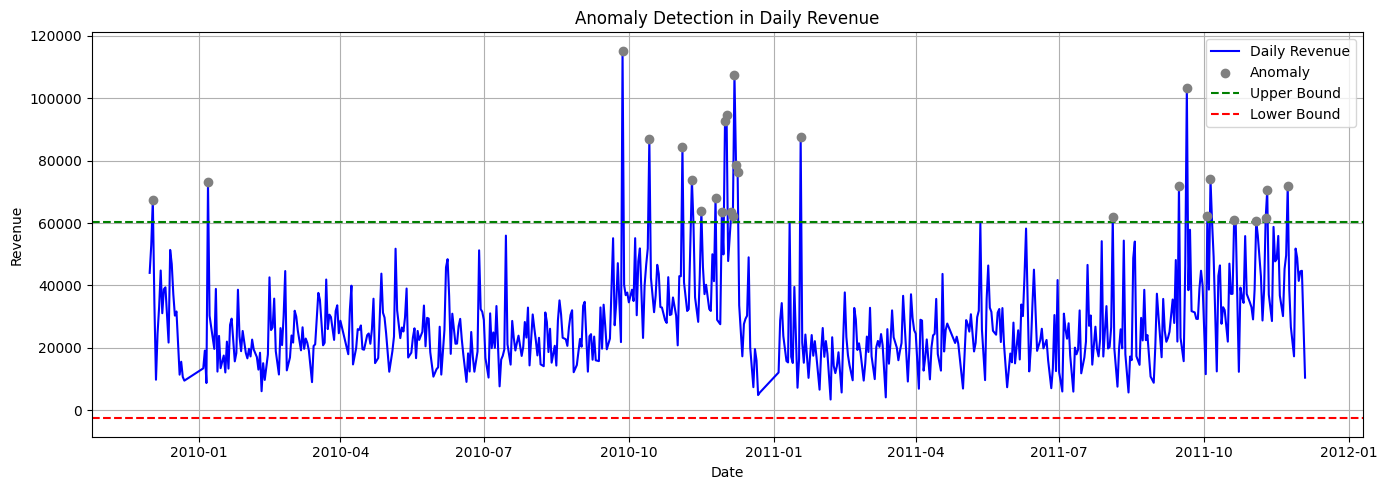

In [106]:
mean_rev = daily['Revenue'].mean()
std_rev = daily['Revenue'].std()

daily['Anomaly'] = (daily['Revenue'] > mean_rev + 2*std_rev) | (daily['Revenue'] < mean_rev - 2*std_rev)

plt.figure(figsize=(14, 5))
plt.plot(daily['Date'], daily['Revenue'], label='Daily Revenue', color='blue')
plt.scatter(daily[daily['Anomaly']]['Date'], daily[daily['Anomaly']]['Revenue'], color='Gray', label='Anomaly', zorder=5)
plt.axhline(mean_rev + 2*std_rev, color='Green', linestyle='--', label='Upper Bound')
plt.axhline(mean_rev - 2*std_rev, color='Red', linestyle='--', label='Lower Bound')

plt.title("Anomaly Detection in Daily Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
